# EDA (Exploratory Data Analysis)

1- Load the dataset  
2- Examine and Clean data  
3- Analyse Target variable: 'hit'  
4- Analyse numerical features  
5- Analyse categorical features  
6- Check for Correlations  
7- Feature importance analysis  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score

# Set style for better visualizations
plt.style.use('seaborn-v0_8-notebook')
sns.set_palette("husl")

## 1- Load the dataset

In [2]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,song_id,release_year,hit,duration_ms,key,mode,time_signature,acousticness,danceability,energy,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
0,000u1dTg7y1XCDXi80hbBX,1989,0,300440,7,1,4,0.181000,0.763,0.440,...,-13.110,0.0388,0.4210,120.492,False,Solo,226699.0,61.0,band,dance pop
1,002pGYO81GoXdB8uNqB4w8,2009,0,215814,2,1,4,0.006300,0.600,0.153,...,-14.028,0.0492,0.2550,172.050,False,Solo,11647.0,28.0,-,-
2,003FTlCpBTM4eSqYSWPv4H,2003,0,233267,7,1,4,0.000065,0.553,0.717,...,-5.857,0.0318,0.3180,127.947,False,Solo,1545572.0,72.0,band,modern rock
3,003eoIwxETJujVWmNFMoZy,2018,0,193680,1,0,4,0.082200,0.353,0.755,...,-6.276,0.7330,0.4370,191.153,False,Solo,5856419.0,84.0,singer,canadian contemporary r&b
4,004ZH9ISUSEwansKKbUdJs,1994,1,291800,7,1,4,0.236000,0.348,0.924,...,-3.048,0.0945,0.0869,114.117,False,Solo,243179.0,56.0,-,album rock


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20402 entries, 0 to 20401
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           20402 non-null  object 
 1   release_year      20402 non-null  int64  
 2   hit               20402 non-null  int64  
 3   duration_ms       20402 non-null  int64  
 4   key               20402 non-null  int64  
 5   mode              20402 non-null  int64  
 6   time_signature    20402 non-null  int64  
 7   acousticness      20402 non-null  float64
 8   danceability      20402 non-null  float64
 9   energy            20402 non-null  float64
 10  instrumentalness  20402 non-null  float64
 11  liveness          20402 non-null  float64
 12  loudness          20402 non-null  float64
 13  speechiness       20402 non-null  float64
 14  valence           20402 non-null  float64
 15  tempo             20402 non-null  float64
 16  explicit          20402 non-null  bool  

## 2- Examine and Clean data

In [4]:
df.describe(include='all')

,song_id,release_year,hit,duration_ms,key,mode,time_signature,acousticness,danceability,energy,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
count,20402,20402.000000,20402.000000,2.040200e+04,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,...,20402.000000,20402.000000,20402.000000,20402.000000,20402,20402,2.039900e+04,20400.000000,20400,20400
unique,20402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,NaN,NaN,6,492
top,000u1dTg7y1XCDXi80hbBX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Solo,NaN,NaN,singer,album rock
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18740,18975,NaN,NaN,8039,2218
mean,NaN,1987.344770,0.385403,2.295247e+05,5.224537,0.726988,3.943584,0.265215,0.600356,0.625031,...,-8.845347,0.067533,0.607777,120.310803,NaN,NaN,1.786720e+06,57.540735,NaN,NaN
std,NaN,16.382452,0.486702,6.696398e+04,3.566935,0.445518,0.289183,0.264377,0.150620,0.197119,...,3.593065,0.074373,0.236530,27.683967,NaN,NaN,4.804166e+06,21.160421,NaN,NaN
min,NaN,1964.000000,0.000000,2.460400e+04,0.000000,0.000000,0.000000,0.000001,0.000000,0.006640,...,-30.896000,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,NaN,NaN
25%,NaN,1972.000000,0.000000,1.864930e+05,2.000000,0.000000,4.000000,0.039200,0.502000,0.481000,...,-11.217750,0.031900,0.427000,99.734250,NaN,NaN,2.629000e+04,44.000000,NaN,NaN
50%,NaN,1985.000000,0.000000,2.230260e+05,5.000000,1.000000,4.000000,0.169500,0.608000,0.640000,...,-8.471000,0.040400,0.632000,118.951000,NaN,NaN,2.712920e+05,61.000000,NaN,NaN
75%,NaN,2002.000000,1.000000,2.596930e+05,8.000000,1.000000,4.000000,0.440000,0.706000,0.783000,...,-6.051000,0.063000,0.804000,135.898250,NaN,NaN,1.253545e+06,73.000000,NaN,NaN


### First conclusions:

* Analyze how 'hit' count change over 'release_year'
* Plot distribution and check outliers for numerical features = ['followers', 'popularity', 'acousticness', 'liveness', 'speechiness', 'instrumentalness', 'loudness', 'energy', 'danceability', 'valence', 'duration_ms', 'tempo']
    * a 'loudness' > 0 is not possible
    * 'followers' and 'duration_ms': These might need scaling due to their large ranges
* Check frequency counts and handle possible imbalance for categorical features = ['genre', 'artist_type', 'song_type', 'explicit', 'key', 'mode', 'time_signature']
    * 'key', 'mode' and 'time_signature' are categorical features: they need conversion
    * Handle 'main_genre': group similar ones, keep only the most common ones
* Handle missing values for 'followers', 'popularity', 'artist_type' and 'main_genre'
    

### Handle 'key', 'mode' and 'time_signature'
These categorical variables are represented by numbers. For converting, I'll use the following map according to the Spotify API documentation:
* 'key': C, (C♯, D♭), D, (D♯, E♭), E, F, (F♯, G♭), G, (G♯, A♭), A, (A♯, B♭), B
* 'mode': major, minor
* 'time_signature': 1/4, 3/4, 4/4, 5/4

Let's convert:

In [5]:
df.key.value_counts()

key
0     2577
7     2370
2     2170
9     2163
5     1805
1     1778
4     1635
11    1461
10    1421
6     1208
8     1176
3      638
Name: count, dtype: int64

In [6]:
key_values = {
    0: 'C',
    1: 'C♯, D♭',
    2: 'D',
    3: 'D♯, E♭',
    4: 'E',
    5: 'F',
    6: 'F♯, G♭',
    7: 'G',
    8: 'G♯, A♭',
    9: 'A',
    10: 'A♯, B♭',
    11: 'B'
}

df.key = df.key.map(key_values)

In [7]:
df['mode'].value_counts(normalize=True)

mode
1    0.726988
0    0.273012
Name: proportion, dtype: float64

As 'mode' is binary, I don't transform it

In [8]:
df.time_signature.value_counts()

time_signature
4    19134
3     1085
5      121
1       61
0        1
Name: count, dtype: int64

In [9]:
df[df.time_signature == 0]

,song_id,release_year,hit,duration_ms,key,mode,time_signature,acousticness,danceability,energy,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
15953,63kd4m3VFxcJjPVVtbVNAu,1964,1,147000,C,1,0,0.842,0.0,0.405,...,-9.935,0.0,0.0,0.0,False,Solo,1798979.0,73.0,singer,adult standards


In [10]:
df[df.tempo == 0]

,song_id,release_year,hit,duration_ms,key,mode,time_signature,acousticness,danceability,energy,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
15953,63kd4m3VFxcJjPVVtbVNAu,1964,1,147000,C,1,0,0.842,0.0,0.405,...,-9.935,0.0,0.0,0.0,False,Solo,1798979.0,73.0,singer,adult standards


There is only one song with no time signature and corresponds with the only one without tempo, which is coherent

In [11]:
time_signature_values = {
    0: 'not applicable',
    1: '1/4',
    3: '3/4',
    4: '4/4',
    5: '5/4'
}

df.time_signature = df.time_signature.map(time_signature_values)

### Handle 'main_genre'

In [12]:
df.main_genre.unique()

array(['dance pop', '-', 'modern rock', 'canadian contemporary r&b',
       'album rock', 'arkansas country', 'dance rock', 'dancehall',
       'canadian pop', 'classic rock', 'alternative hip hop',
       'classic soul', 'brill building pop', 'alternative pop',
       'blues-rock', 'glam metal', 'grunge pop', 'reggae',
       'classic uk pop', 'contemporary country', 'australian pop',
       'adult standards', 'acoustic pop', 'motown', 'hip hop',
       'beach music', 'art rock', 'karaoke', 'east coast hip hop',
       'chicago drill', 'emo rap', 'classic canadian rock', 'bass trap',
       'soft rock', 'freestyle', 'chicago soul', 'cowpunk',
       'british soul', 'atl hip hop', 'bluegrass', 'alternative metal',
       'funk', 'jazz blues', 'detroit hip hop', 'bow pop', 'idol',
       'rhythm and blues', 'chicago rap', 'country road',
       'british invasion', 'crunk', 'afrobeat', 'art pop', 'neo soul',
       'alternative rock', 'space age pop', 'classic girl group',
       'euroda

In [13]:
genre_mapping = {
    'pop': ['pop', 'dance pop', 'canadian pop', 'brill building pop', 'alternative pop', 'classic uk pop', 'australian pop', 'acoustic pop', 'bow pop', 'idol', 'art pop', 'space age pop', 'post-teen pop', 'new wave pop', 'candy pop', 'teen pop', 'classic swedish pop', 'austropop', 'indie pop', 'europop', 'britpop', 'afropop', 'power pop', 'pop rap', 'indie pop rap', 'latin pop', 'sunshine pop', 'baroque pop', 'ecuadorian pop', 'chamber pop', 'colombian pop', 'antiviral pop', 'belgian pop', 'french pop', 'operatic pop', 'k-pop', 'dutch pop', 'jewish pop', 'classic norwegian pop', 'german pop', 'nederpop', 'latin viral pop', 'classic danish pop', 'channel pop', 'nyc pop', 'metropopolis', 'danish pop', 'deep acoustic pop', 'israeli pop', 'classic italian pop', 'classic belgian pop', 'classic nz pop', 'reunion pop', 'vapor pop'],
    'rock': ['rock', 'album rock', 'dance rock', 'classic rock', 'hard rock', 'grunge pop', 'art rock', 'classic canadian rock', 'cowpunk', 'british invasion', 'alternative rock', 'emo', 'neo mellow', 'permanent wave', 'indie rock', 'glam rock', 'yacht rock', 'classic russian rock', 'jangle pop', 'mellow gold', 'belgian rock', 'rock-and-roll', 'classic garage rock', 'psychedelic rock', 'australian rock', 'new romantic', 'c86', 'psychedelic blues-rock', 'garage rock', 'surf music', 'new wave', 'boston rock', 'canadian rock', 'modern alternative rock', 'irish rock', 'rap rock', 'melodic hard rock', 'progressive rock', 'experimental rock', 'pop rock', 'christian alternative rock', 'canadian pop punk', 'indie poptimism', 'pub rock', 'german hard rock', 'australian alternative rock', 'pop punk', 'deep new wave', 'indie shoegaze', 'crust punk', 'deep melodic hard rock', 'swedish alternative rock', 'alternative pop rock', 'deep punk rock', 'roots rock', 'anarcho-punk', 'horror punk', 'merseybeat', 'freakbeat', 'j-poprock', 'deep classic garage rock', 'celtic rock', 'scottish new wave', 'british indie rock', 'screamo punk', 'mod revival', 'dance-punk', 'easycore', 'czech rock', 'piano rock', 'argentine punk', 'french shoegaze', 'neo-rockabilly', 'dutch rock', 'post-grunge'],
    'hip hop/rap': ['hip hop', 'rap', 'alternative hip hop', 'east coast hip hop', 'chicago drill', 'emo rap', 'bass trap', 'freestyle', 'atl hip hop', 'detroit hip hop', 'chicago rap', 'crunk', 'canadian hip hop', 'conscious hip hop', 'dfw rap', 'gangster rap', 'philly rap', 'chicano rap', 'lgbtq+ hip hop', 'g funk', 'hip pop', 'p funk', 'dirty south rap', 'baton rouge rap', 'houston rap', 'new jersey rap', 'nyc rap', 'hardcore hip hop', 'cali rap', 'florida rap', 'deep east coast hip hop', 'trap music', 'bounce', 'battle rap', 'hyphy', 'escape room', 'deep freestyle', 'viral trap', 'urban contemporary', 'miami hip hop', 'australian hip hop', 'trap soul', 'hawaiian hip hop', 'rap conscient', 'deep southern trap', 'nc hip hop', 'old school hip hop', 'chinese hip hop', 'bboy', 'new orleans rap', 'new jack smooth', 'alabama rap', 'detroit trap'],
    'soul/r&b': ['soul', 'classic soul', 'r&b', 'canadian contemporary r&b', 'motown', 'deep motown', 'beach music', 'chicago soul', 'british soul', 'rhythm and blues', 'neo soul', 'northern soul', 'deep pop r&b', 'new jack swing', 'quiet storm', 'deep southern soul', 'deep northern soul', 'alternative r&b', 'memphis soul', 'southern soul', 'philly soul', 'neo r&b', 'gospel r&b', 'traditional soul', 'japanese r&b', 'indie r&b'],
    'country': ['country', 'contemporary country', 'arkansas country', 'bluegrass', 'country road', 'australian country', 'country rock', 'cosmic american', 'country dawn', 'heartland rock', 'canadian country', 'alberta country', 'nashville sound', 'alternative country', 'modern rock', 'modern country rock', 'southern rock', 'progressive bluegrass', 'traditional country', 'neo-traditional country', 'modern southern rock', 'outlaw country', 'deep contemporary country'],
    'reggae': ['reggae', 'dancehall', 'reggae fusion', 'lovers rock', 'uk reggae', 'soca', 'dub', 'rock steady', 'gospel reggae'],
    'blues': ['blues', 'blues-rock', 'british blues', 'electric blues', 'louisiana blues', 'jump blues', 'canadian blues', 'acoustic blues', 'soul blues'],
    'metal': ['metal', 'alternative metal', 'glam metal', 'alabama metal', 'metalcore', 'buffalo ny metal', 'nu-metalcore', 'corrosion', 'groove metal', 'german metalcore', 'christian metal', 'j-metal', 'comic metal', 'gothic metal'],
    'adult standards': ['adult standards', 'deep adult standards', 'soft rock', 'deep soft rock'],
    'funk': ['funk', 'deep funk', 'rare groove', 'minneapolis sound', 'brit funk', 'funk rock', 'instrumental funk', 'go-go', 'funk metal'],
    'jazz': ['jazz blues', 'vocal jazz', 'jazz trumpet', 'acid jazz', 'bebop', 'smooth jazz', 'soul jazz', 'jazz funk', 'jam band', 'bossa nova jazz', 'jazz organ', 'contemporary post-bop', 'big band', 'jazz guitar', 'jazz saxophone', 'jazz violin', 'jazz electric bass', 'british jazz', 'neo soul-jazz', 'indie jazz', 'cool jazz', 'deep free jazz', 'jazz vibraphone', 'dixieland', 'latin jazz'],
    'folk/indie': ['folk', 'american folk revival', 'lilith', 'canadian folk', 'british folk', 'folk rock', 'alaska indie', 'folk-pop', 'canadian indie', 'michigan indie', 'australian indie', 'scottish singer-songwriter', 'icelandic indie', 'canadian singer-songwriter', 'canadian celtic', 'scottish americana', 'alabama indie', 'ectofolk', 'appalachian folk', 'singer-songwriter', 'albuquerque indie', 'cantautor', 'chanson', 'psychedelic folk', 'dutch indie', 'k-indie', 'brooklyn indie', 'anti-folk', 'la indie', 'deep new americana', 'neo-singer-songwriter', 'indian indie', 'manitoba indie', 'indie folk'],
    'disco': ['disco', 'deep disco', 'disco house', 'italian disco', 'post-disco', 'bubble trance', 'post-disco soul'],
    'electronic/dance': ['electro', 'eurodance', 'big beat', 'brostep', 'miami bass', 'hardcore techno', 'hip house', 'trip hop', 'australian dance', 'hi-nrg', 'diva house', 'chicago house', 'electroclash', 'edm', 'electropop', 'big room', 'alternative dance', 'deep groove house', 'synthpop', 'aussietronica', 'easy listening', 'brazilian house', 'vocal house', 'electronic', 'electro latino', 'hopebeat', 'acid house', 'ballroom', 'electropowerpop', 'downtempo', 'bass trip', 'tropical house', 'electrofox', 'cyberpunk', 'lo-fi beats', 'deep vocal house', 'ebm', 'basshall', 'belgian dance', 'vintage french electronic', 'deep eurodance', 'deep progressive trance', 'electro house', 'dubstep', 'pop edm', 'bassline', 'detroit house', 'deep house', '8-bit', 'gabba', 'funky tech house', 'neo-synthpop', 'german techno', 'moog', 'lounge'],
    'classical/soundtrack': ['classic soundtrack', 'hollywood', 'orchestra', 'anthem worship', 'movie tunes', 'disney', 'broadway', 'show tunes', 'classical performance', 'coverchill', 'healing', 'german soundtrack', 'classical', 'scorecore', 'canadian soundtrack'],
    'gospel': ['gospel', 'contemporary gospel', 'doo-wop', 'country gospel', 'anglican liturgy', 'canadian ccm', 'ccm', 'deep latin christian', 'muzica crestina', 'pinoy praise'],
    'kids': ['kids dance party', 'boy band', 'bubblegum pop', 'bubblegum dance', "children's music", 'musica para ninos', 'boy pop', 'classic girl group', 'girl group', 'j-pop girl group', 'musica infantil', "australian children's music"],
    'traditional': ['afrobeat', 'swamp pop', 'spanish invasion', 'flamenco', 'finnish rockabilly', 'sertanejo', 'bossa nova', 'mpb', 'latin', 'paracana', 'funana', 'reggaeton', 'celtic', 'bolero', 'bachata', 'boogaloo', 'native american', 'classic schlager', 'canadian latin', 'afrikaans', 'azonto', 'cabaret', 'cumbia', 'traditional rockabilly', 'tejano', 'romantico', 'banjo', 'choro', 'acoustic opm', 'chutney'],
    'functional': ['piano cover', 'karaoke', 'sleep', 'lullaby', 'a cappella', 'comic', 'clean comedy', 'comedy', 'audiophile vocal', 'workout product', 'song poem', 'halloween', 'tribute'],
    'instrument': ['cello', 'pianissimo', 'didgeridoo', 'steelpan', 'bagpipe', 'music box'],
    'other': ['fake', 'outsider', 'talent show', 'deep talent show', 'classify', 'avant-garde', 'experimental', 'melancholia', 'nan']
}

def map_genre(main_genre):
    for genre, subgenres in genre_mapping.items():
        if main_genre in subgenres:
            return genre
    return 'unknown'  # For any genre not in the mapping

df['genre'] = df['main_genre'].apply(map_genre)
df = df.drop(['main_genre'], axis=1)
df

,song_id,release_year,hit,duration_ms,key,mode,time_signature,acousticness,danceability,energy,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,genre
0,000u1dTg7y1XCDXi80hbBX,1989,0,300440,G,1,4/4,0.181000,0.763,0.440,...,-13.110,0.0388,0.4210,120.492,False,Solo,226699.0,61.0,band,pop
1,002pGYO81GoXdB8uNqB4w8,2009,0,215814,D,1,4/4,0.006300,0.600,0.153,...,-14.028,0.0492,0.2550,172.050,False,Solo,11647.0,28.0,-,unknown
2,003FTlCpBTM4eSqYSWPv4H,2003,0,233267,G,1,4/4,0.000065,0.553,0.717,...,-5.857,0.0318,0.3180,127.947,False,Solo,1545572.0,72.0,band,country
3,003eoIwxETJujVWmNFMoZy,2018,0,193680,"C♯, D♭",0,4/4,0.082200,0.353,0.755,...,-6.276,0.7330,0.4370,191.153,False,Solo,5856419.0,84.0,singer,soul/r&b
4,004ZH9ISUSEwansKKbUdJs,1994,1,291800,G,1,4/4,0.236000,0.348,0.924,...,-3.048,0.0945,0.0869,114.117,False,Solo,243179.0,56.0,-,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20397,7zu3Xuz7D8OTilEr2oHKdL,1997,0,318773,B,1,4/4,0.315000,0.391,0.514,...,-6.398,0.0447,0.4370,177.872,False,Solo,74445.0,56.0,singer,folk/indie
20398,7zySrJDb2H7fn2kF3t9odr,1966,0,206427,D,0,4/4,0.100000,0.489,0.531,...,-13.871,0.0345,0.6120,153.589,False,Solo,15728.0,46.0,-,pop
20399,7zydM7FeDlFUPCXdY2GCgZ,1980,0,258147,C,1,4/4,0.000833,0.585,0.906,...,-8.235,0.0564,0.7470,122.132,False,Solo,1283375.0,71.0,band,rock
20400,7zywdG4ysfC5XNBzjQAo2o,2004,1,202760,G,1,4/4,0.123000,0.443,0.885,...,-6.172,0.0414,0.5360,185.034,False,Solo,735490.0,65.0,duo,country


### Handle 'loudness'

In [14]:
df.loudness[df.loudness >= 0]

9874     2.291
15754    3.440
Name: loudness, dtype: float64

In [15]:
# Correct positive loudness values by making them negative
df.loc[df['loudness'] > 0, 'loudness'] *= -1

In [16]:
# Check that there are no positive loudness values left
assert (df['loudness'] <= 0).all(), "Some loudness values are still positive!"

### Handle Missing Values

In [17]:
df.isnull().sum()

song_id             0
release_year        0
hit                 0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
explicit            0
song_type           0
followers           3
popularity          2
artist_type         2
genre               0
dtype: int64

I decide to fill the 3 missing 'followers' and 2 'popularity' by their respective median value:

In [18]:
df.followers = df.followers.fillna(df.followers.median())
df.popularity = df.popularity.fillna(df.popularity.median())

In [19]:
df.artist_type.value_counts()

artist_type
singer    8039
band      6775
-         4164
rapper     895
duo        458
DJ          69
Name: count, dtype: int64

Let's for now replace the 2 'artist_type' missing values by the '-' category:

In [20]:
df.artist_type = df.artist_type.fillna('-')

In [21]:
df.isnull().sum()

song_id             0
release_year        0
hit                 0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
explicit            0
song_type           0
followers           0
popularity          0
artist_type         0
genre               0
dtype: int64

## 3- Analyse Target variable: 'hit'

In [22]:
df.hit.value_counts()

hit
0    12539
1     7863
Name: count, dtype: int64

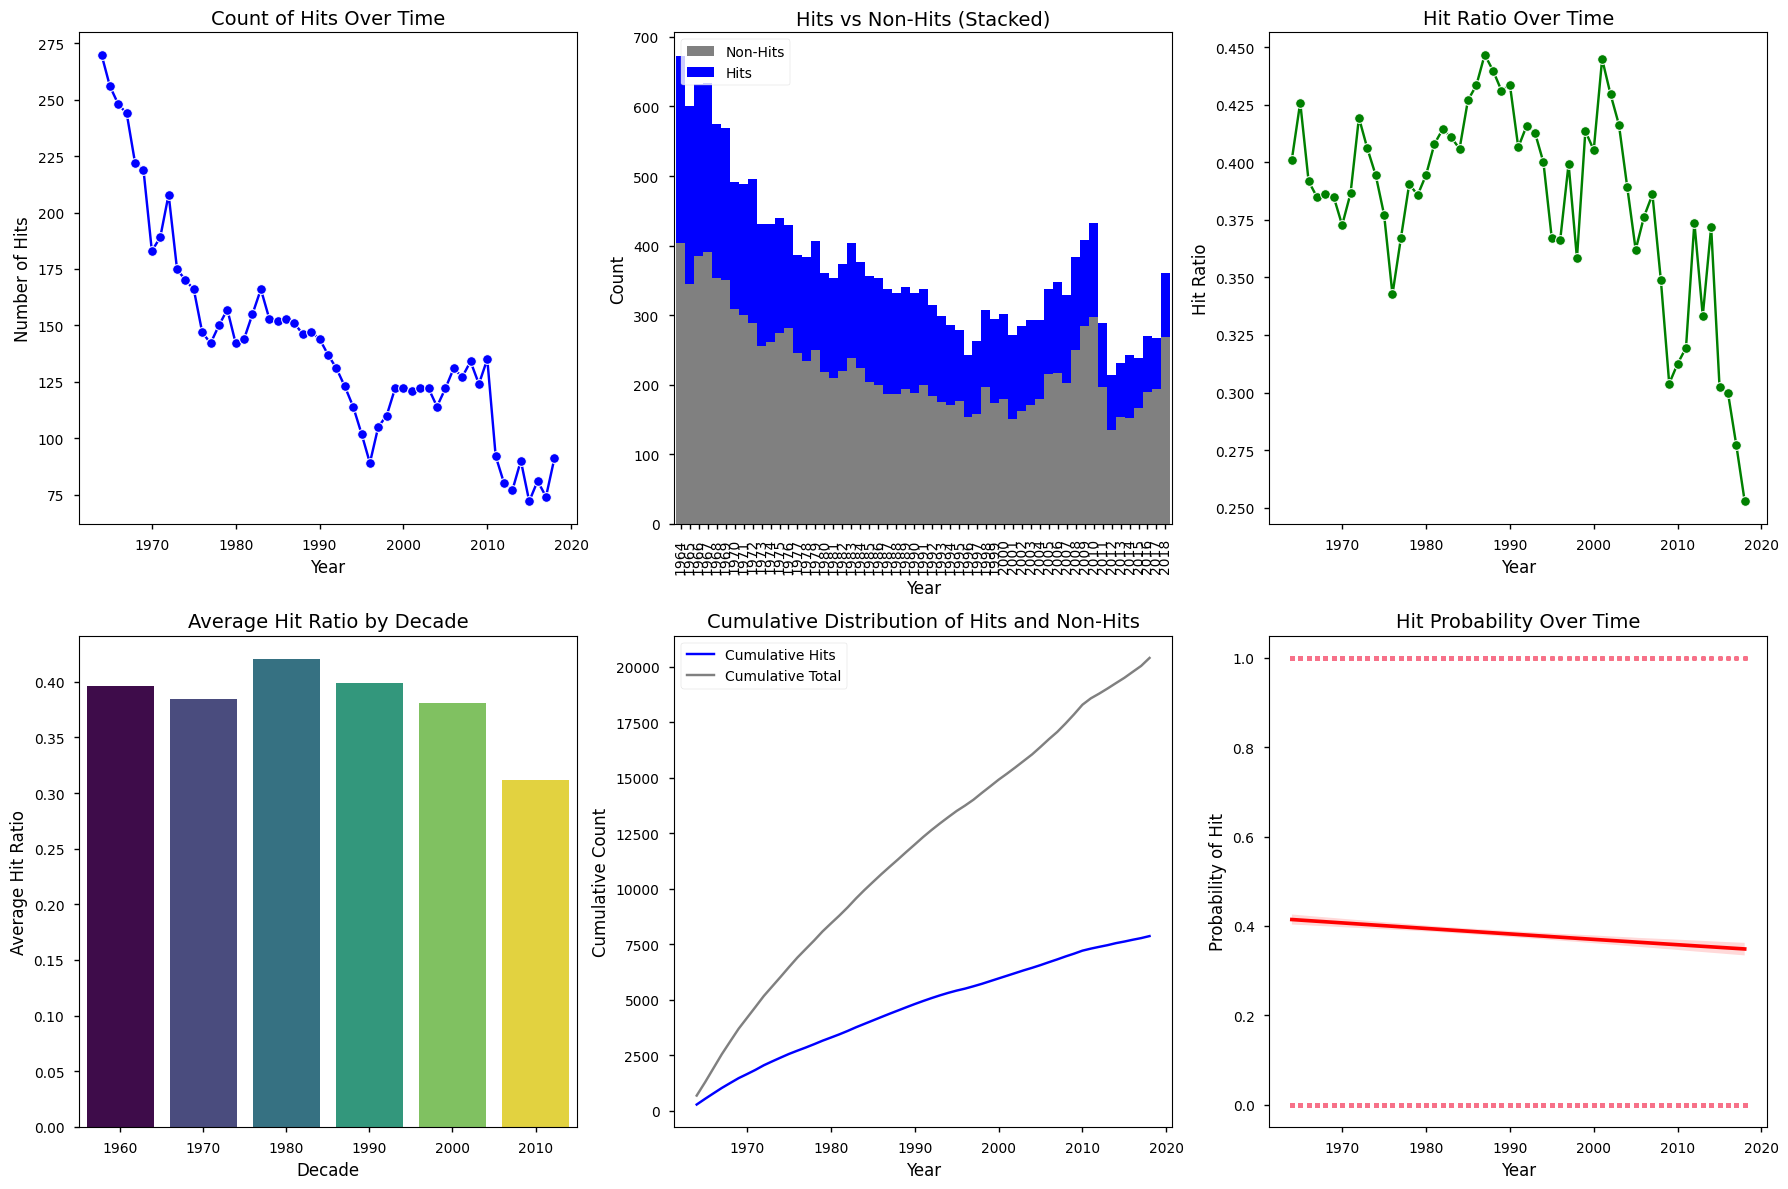

In [23]:
plt.figure(figsize=(18, 12))

# Plot 1: Count of Hits Over Time
plt.subplot(2, 3, 1)
hits_per_year = df.groupby('release_year')['hit'].sum()
sns.lineplot(x=hits_per_year.index, y=hits_per_year.values, marker='o', color='b')
plt.title('Count of Hits Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hits', fontsize=12)

# Plot 2: Stacked Bar Plot of Hits vs Non-Hits
plt.subplot(2, 3, 2)
hits_vs_non_hits = df.groupby('release_year')['hit'].value_counts().unstack().fillna(0)
hits_vs_non_hits.plot(kind='bar', stacked=True, width=1, ax=plt.gca(), color=['gray', 'blue'], legend=False)
plt.title('Hits vs Non-Hits (Stacked)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Non-Hits', 'Hits'], fontsize=10, loc='upper left')

# Plot 3: Hit Ratio Over Time
plt.subplot(2, 3, 3)
hit_ratio_per_year = hits_per_year / df['release_year'].value_counts().sort_index()
sns.lineplot(x=hit_ratio_per_year.index, y=hit_ratio_per_year.values, marker='o', color='green')
plt.title('Hit Ratio Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hit Ratio', fontsize=12)

# Plot 4: Decade-Wise Analysis
plt.subplot(2, 3, 4)
df['decade'] = (df['release_year'] // 10) * 10
decade_hit_ratio = df.groupby('decade')['hit'].mean()
sns.barplot(
    x=decade_hit_ratio.index.astype(int),
    y=decade_hit_ratio.values,
    hue=decade_hit_ratio.index.astype(int),
    palette='viridis',
    dodge=False
)
plt.legend([], [], frameon=False)
plt.title('Average Hit Ratio by Decade', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Hit Ratio', fontsize=12)

# Plot 5: Cumulative Distribution of Hits and Non-Hits
plt.subplot(2, 3, 5)
cumulative_hits = hits_per_year.cumsum()
cumulative_total = df['release_year'].value_counts().sort_index().cumsum()
sns.lineplot(x=cumulative_hits.index, y=cumulative_hits.values, label='Cumulative Hits', color='blue')
sns.lineplot(x=cumulative_total.index, y=cumulative_total.values, label='Cumulative Total', color='gray')
plt.title('Cumulative Distribution of Hits and Non-Hits', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Count', fontsize=12)
plt.legend(fontsize=10)

# Plot 6: Regression Plot for Hit Probability Over Time
plt.subplot(2, 3, 6)
sns.regplot(x='release_year', y='hit', data=df, logistic=True, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Hit Probability Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Probability of Hit', fontsize=12)

plt.tight_layout()
plt.show()

* Non-hits consistently outnumber hits across all years. The total number of songs per year appears to decrease slightly after the mid-1980s, with a resurgence around the 2000s.  
* The hit ratio decline suggests a lower "hit rate" for songs over time, which may reflect increased competition, diversification in music consumption, or changes in how hits are identified (e.g., by charts, streaming, or sales).  
* Both cumulative hits and total songs grow over time, but the gap between them widens: Hits are becoming relatively rarer over time, which aligns with the declining hit ratio.  
* However, the regression line appears almost flat, indicating a subtle trend. The overall chance of a song being a hit hasn't drastically changed, but small declines may reflect industry saturation or evolving listener preferences.

## 4- Analyse numerical features

In [24]:
numerical = ['duration_ms', 'followers', 'popularity', 'acousticness', 'liveness', 'speechiness', 
            'instrumentalness', 'loudness', 'energy', 'danceability', 'valence', 'tempo']

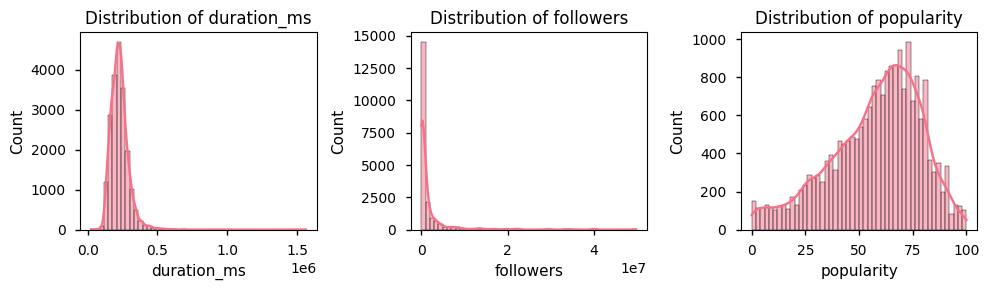

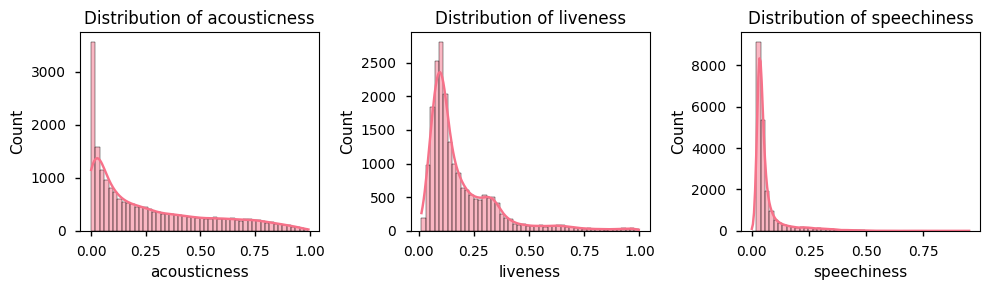

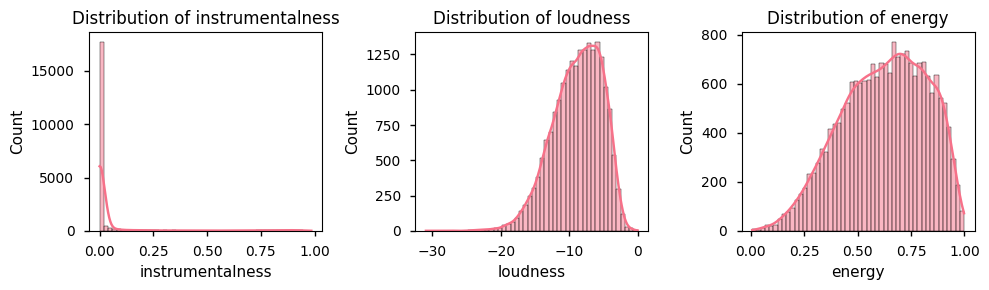

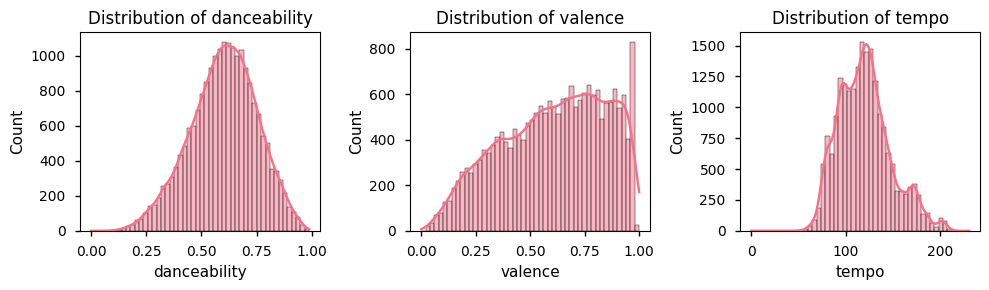

In [25]:
for i in range(0, len(numerical), 3):
        plt.figure(figsize=(10, 3))
        for j in range(3):
            if i + j < len(numerical):
                plt.subplot(1, 3, j+1)
                sns.histplot(df[numerical[i+j]], bins=50, kde=True)
                plt.title(f'Distribution of {numerical[i+j]}')
        plt.tight_layout()
        plt.show()

'duration_ms' and 'followers' need a log-transformation, due to their very large range compare to other features between 0 and 1:

In [26]:
df['duration_log'] = np.log1p(df['duration_ms'])
df['followers_log'] = np.log1p(df['followers'])

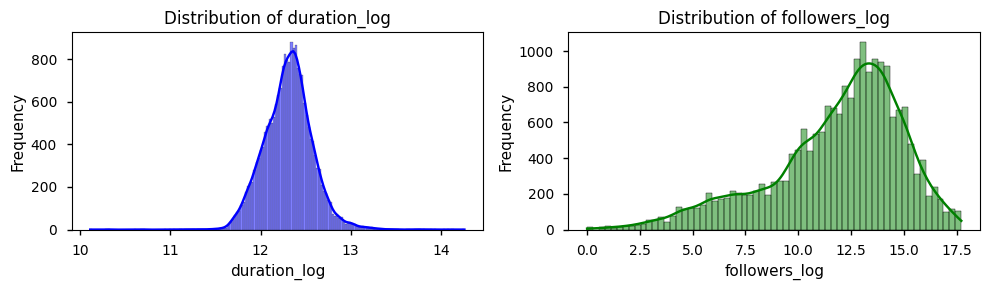

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df['duration_log'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of duration_log')
axes[0].set_xlabel('duration_log')
axes[0].set_ylabel('Frequency')

sns.histplot(df['followers_log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of followers_log')
axes[1].set_xlabel('followers_log')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

At the end, numerical features may need to be standardized or scaled to center the data and make them all comparable.

## 5- Analyse categorical features

In [28]:
categorical = ['key', 'mode', 'time_signature', 'explicit', 'song_type', 'artist_type', 'genre']

In [29]:
def analyze_categorical_features(df, categorical, target='hit'):
    results = {}
    
    for col in categorical:
        col_analysis = {}
        
        # 1. Basic value counts and proportions
        value_counts = df[col].value_counts()
        value_props = df[col].value_counts(normalize=True)
        
        col_analysis['value_counts'] = value_counts
        col_analysis['value_proportions'] = value_props
        
        # 2. Cross-tabulation with target
        cross_tab = pd.crosstab(df[col], df[target])
        cross_tab_pct = pd.crosstab(df[col], df[target], normalize='index') * 100
        
        col_analysis['cross_tab'] = cross_tab
        col_analysis['cross_tab_pct'] = cross_tab_pct
        
        # 3. Calculate hit rate for each category
        hit_rates = cross_tab_pct[1].sort_values(ascending=False)
        col_analysis['hit_rates'] = hit_rates
        
        # 4. Create visualization
        plt.figure(figsize=(12, 6))
        
        # Subplot 1: Value distribution
        plt.subplot(1, 2, 1)
        value_props.plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)
        
        # Subplot 2: Hit rates by category
        plt.subplot(1, 2, 2)
        hit_rates.plot(kind='bar')
        plt.title(f'Hit Rates by {col}')
        plt.xlabel(col)
        plt.ylabel('Hit Rate (%)')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        
        # Store analysis results
        results[col] = col_analysis
        
        # Print summary statistics
        print(f"\n=== Analysis for {col} ===")
        print("\nValue Counts:")
        print(value_counts)
        print("\nHit Rates by Category:")
        print(hit_rates)
        
        plt.show()
        plt.close()
    
    return results

def print_key_insights(results):
    print("\n=== KEY INSIGHTS ===")
    for col, analysis in results.items():
        # Get top categories by hit rate
        top_categories = analysis['hit_rates'].head(3)
        
        print(f"\n{col}:")
        print(f"- Top 3 categories by hit rate:")
        for category, hit_rate in top_categories.items():
            print(f"  * {category}: {hit_rate:.1f}%")


=== Analysis for key ===

Value Counts:
key
C         2577
G         2370
D         2170
A         2163
F         1805
C♯, D♭    1778
E         1635
B         1461
A♯, B♭    1421
F♯, G♭    1208
G♯, A♭    1176
D♯, E♭     638
Name: count, dtype: int64

Hit Rates by Category:
key
D♯, E♭    42.163009
B         39.835729
G♯, A♭    39.625850
C♯, D♭    39.595051
F         39.335180
A         38.834951
F♯, G♭    38.245033
C         38.183935
E         38.165138
G         37.932489
D         37.880184
A♯, B♭    35.256861
Name: 1, dtype: float64


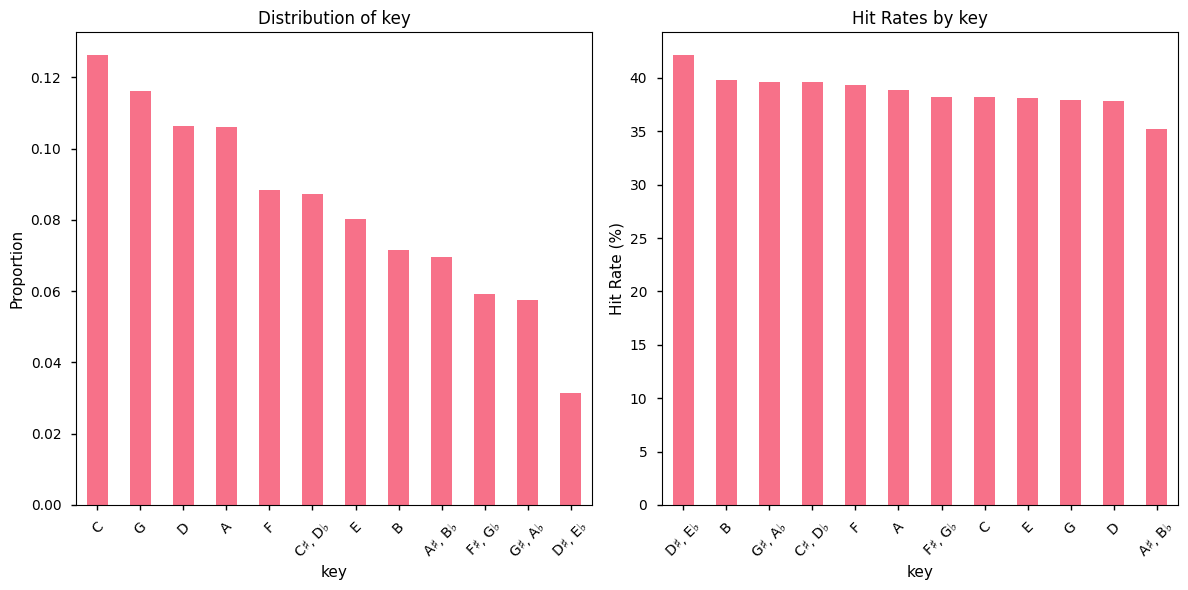


=== Analysis for mode ===

Value Counts:
mode
1    14832
0     5570
Name: count, dtype: int64

Hit Rates by Category:
mode
1    38.619202
0    38.330341
Name: 1, dtype: float64


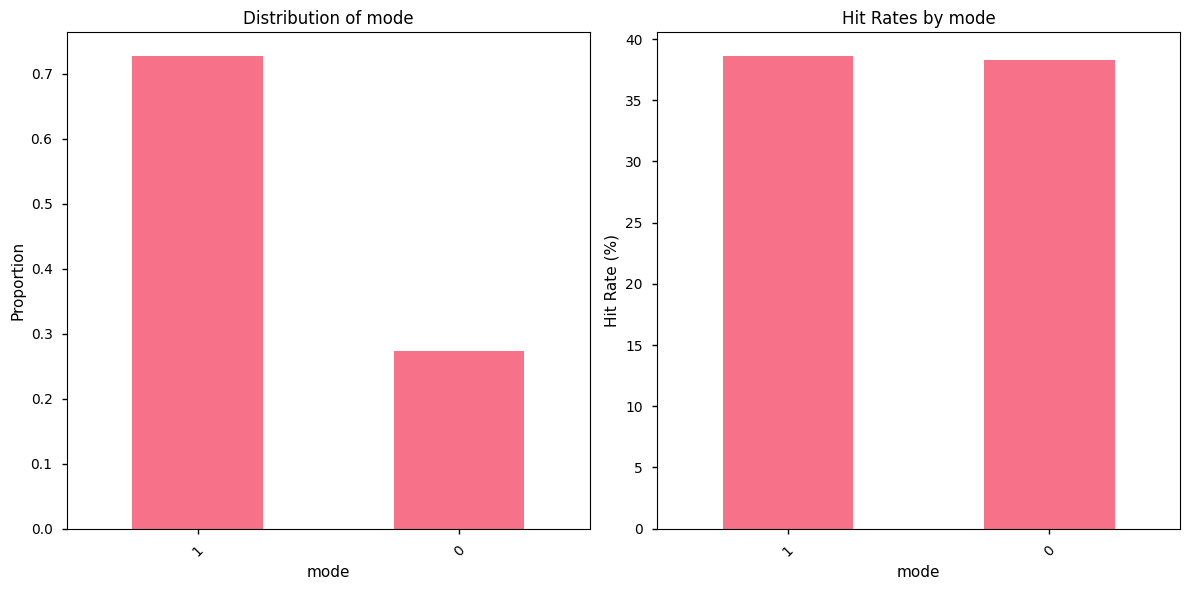


=== Analysis for time_signature ===

Value Counts:
time_signature
4/4               19134
3/4                1085
5/4                 121
1/4                  61
not applicable        1
Name: count, dtype: int64

Hit Rates by Category:
time_signature
not applicable    100.000000
4/4                39.014320
5/4                38.842975
3/4                30.783410
1/4                26.229508
Name: 1, dtype: float64


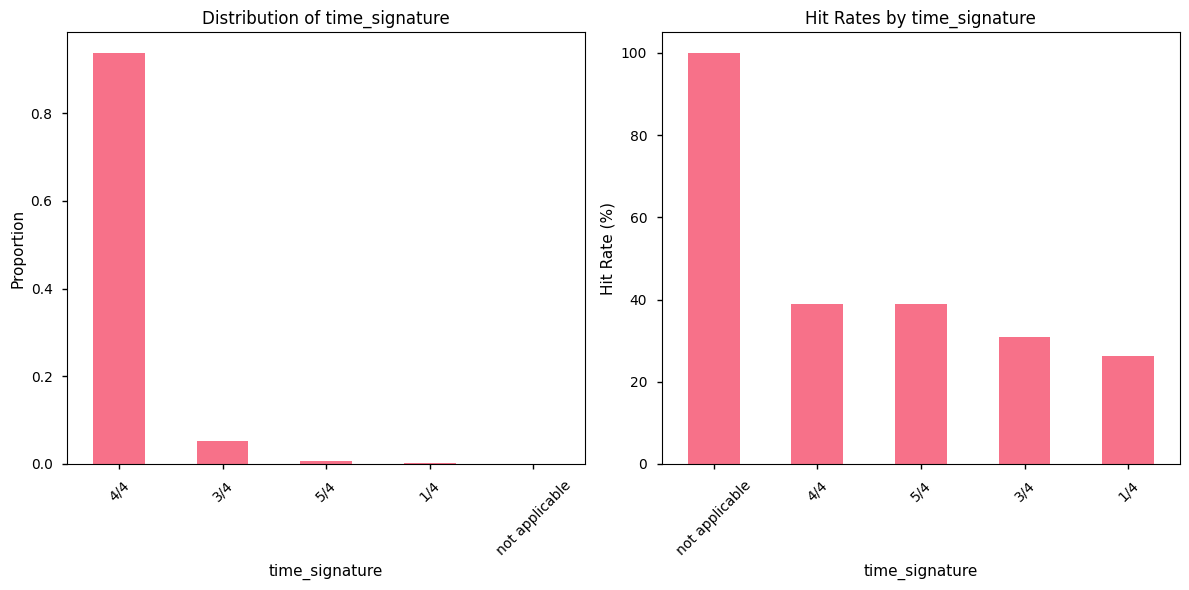


=== Analysis for explicit ===

Value Counts:
explicit
False    18740
True      1662
Name: count, dtype: int64

Hit Rates by Category:
explicit
False    38.975454
True     33.634176
Name: 1, dtype: float64


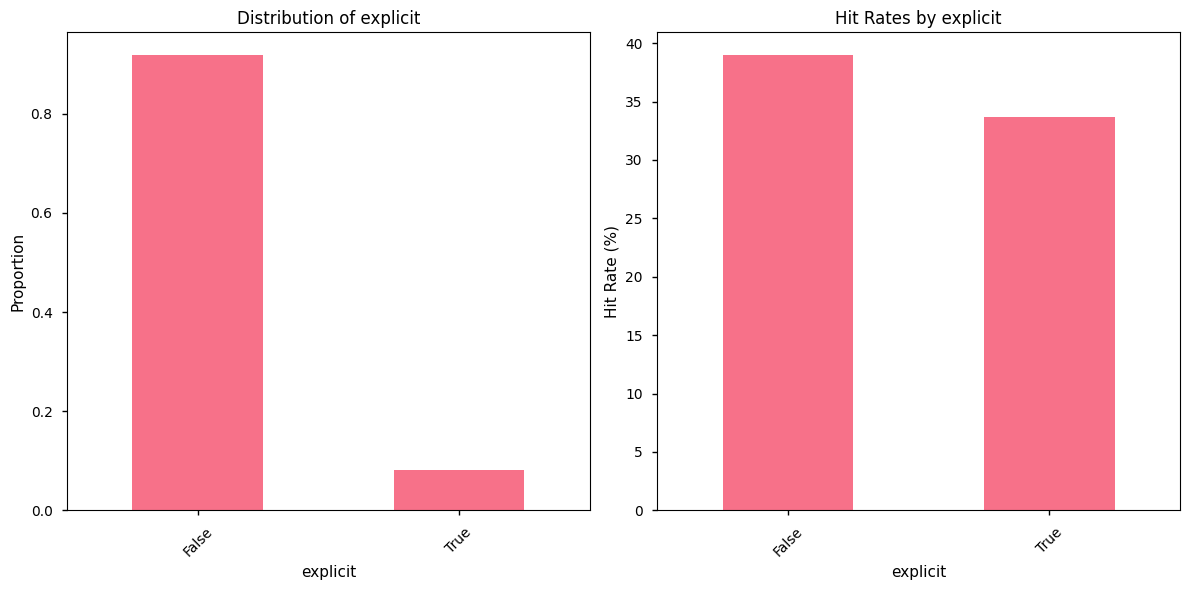


=== Analysis for song_type ===

Value Counts:
song_type
Solo             18975
Collaboration     1427
Name: count, dtype: int64

Hit Rates by Category:
song_type
Collaboration    38.752628
Solo             38.524374
Name: 1, dtype: float64


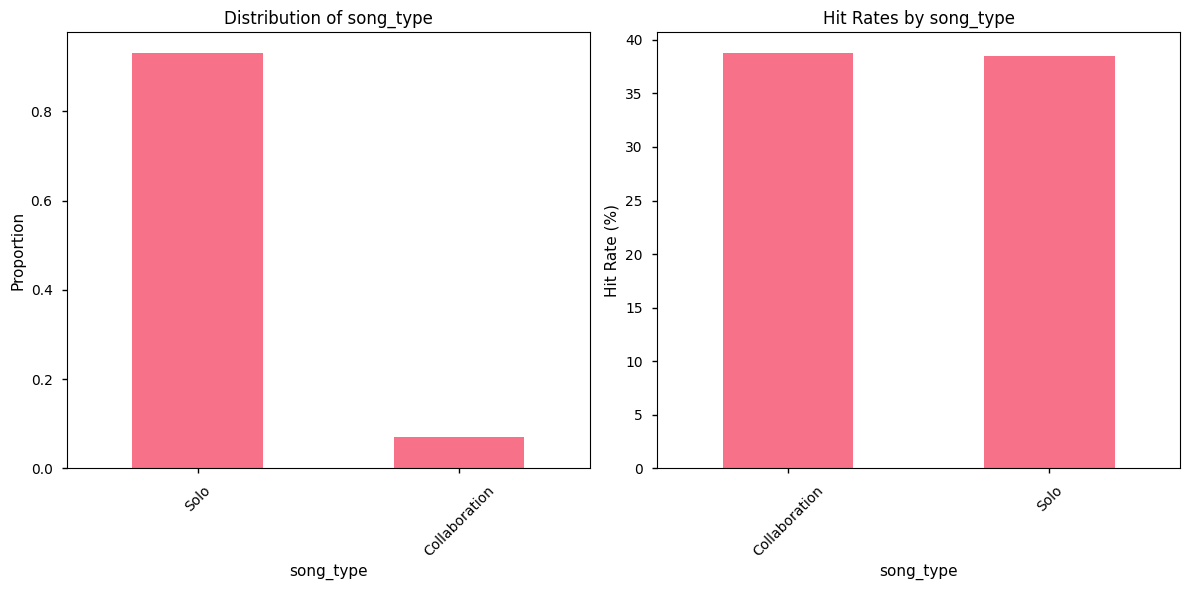


=== Analysis for artist_type ===

Value Counts:
artist_type
singer    8039
band      6775
-         4166
rapper     895
duo        458
DJ          69
Name: count, dtype: int64

Hit Rates by Category:
artist_type
duo       42.576419
DJ        40.579710
band      40.073801
singer    39.793507
-         34.445511
rapper    32.513966
Name: 1, dtype: float64


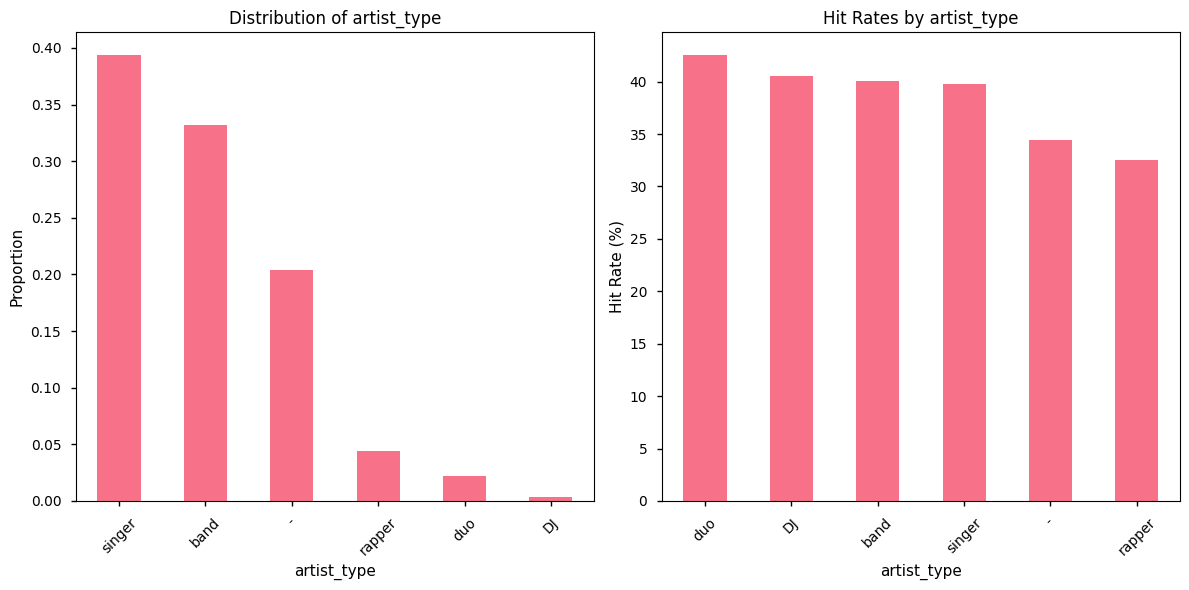


=== Analysis for genre ===

Value Counts:
genre
rock                    3770
pop                     3591
unknown                 2211
adult standards         1846
soul/r&b                1713
country                 1685
hip hop/rap             1647
kids                     723
disco                    483
functional               461
metal                    398
folk/indie               333
funk                     314
electronic/dance         294
blues                    253
classical/soundtrack     157
gospel                   144
jazz                     131
traditional              123
reggae                    85
other                     34
instrument                 6
Name: count, dtype: int64

Hit Rates by Category:
genre
functional              48.806941
kids                    45.643154
pop                     43.803954
rock                    43.129973
adult standards         42.903575
disco                   37.060041
folk/indie              36.636637
country            

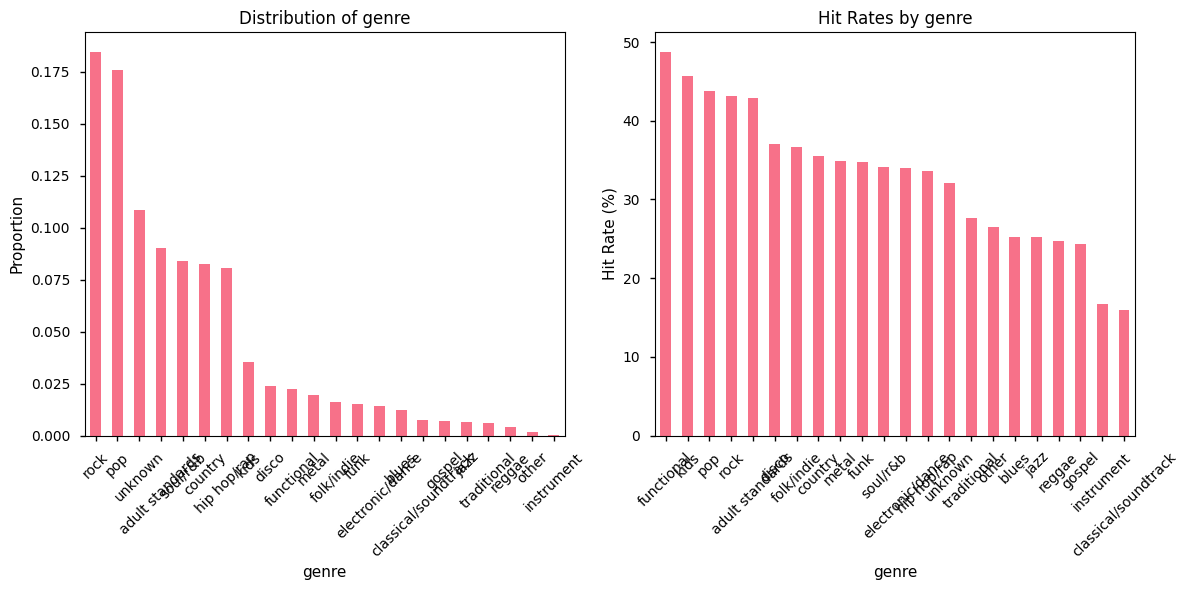


=== KEY INSIGHTS ===

key:
- Top 3 categories by hit rate:
  * D♯, E♭: 42.2%
  * B: 39.8%
  * G♯, A♭: 39.6%

mode:
- Top 3 categories by hit rate:
  * 1: 38.6%
  * 0: 38.3%

time_signature:
- Top 3 categories by hit rate:
  * not applicable: 100.0%
  * 4/4: 39.0%
  * 5/4: 38.8%

explicit:
- Top 3 categories by hit rate:
  * False: 39.0%
  * True: 33.6%

song_type:
- Top 3 categories by hit rate:
  * Collaboration: 38.8%
  * Solo: 38.5%

artist_type:
- Top 3 categories by hit rate:
  * duo: 42.6%
  * DJ: 40.6%
  * band: 40.1%

genre:
- Top 3 categories by hit rate:
  * functional: 48.8%
  * kids: 45.6%
  * pop: 43.8%


In [30]:
results = analyze_categorical_features(df, categorical)
print_key_insights(results)

I keep 'unknown' genres as a separate category: If unknown is frequent enough to have its own consistent pattern, keeping it as a separate genre category might be sufficient, allowing the model to learn any relationships that exist between unknown and other features.

## 6- Check for Correlations

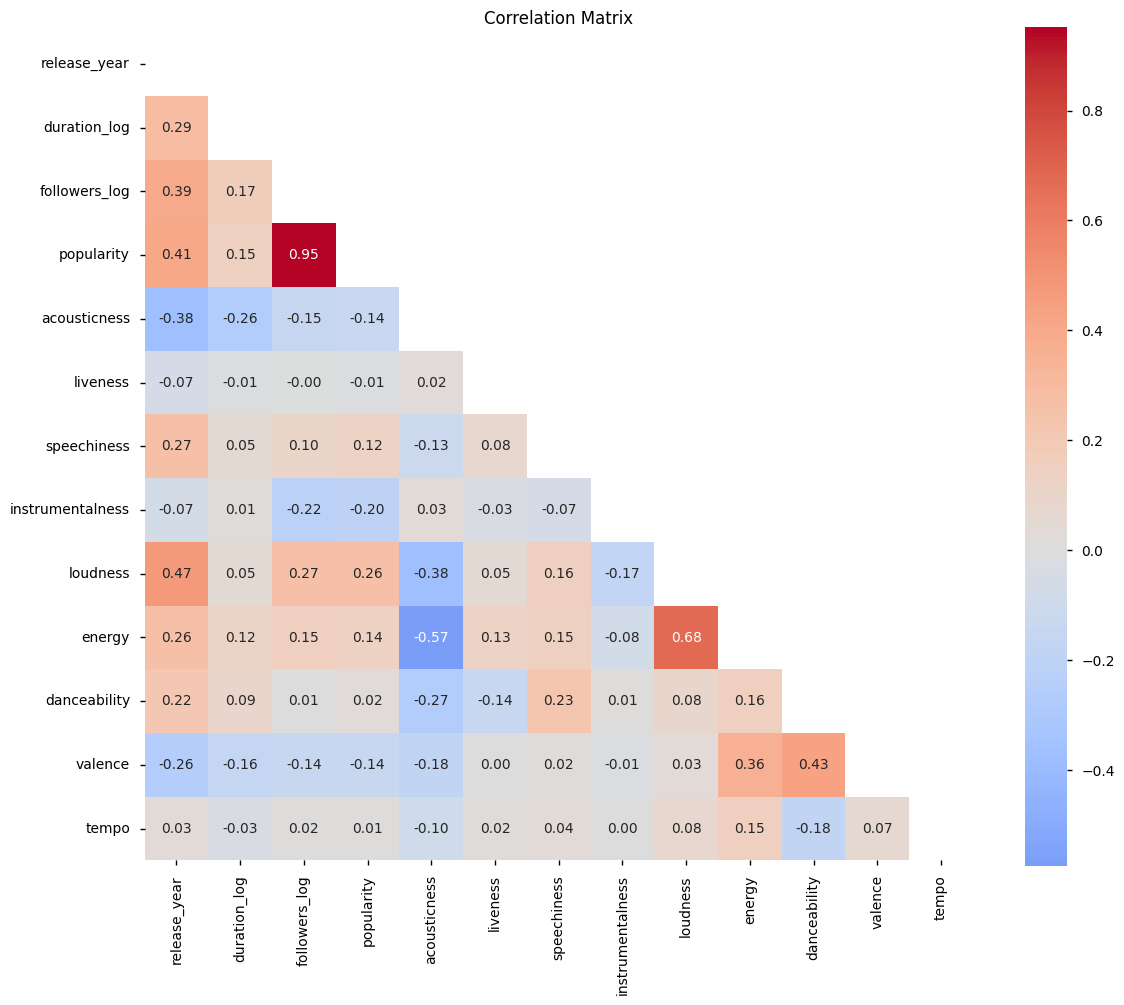

In [31]:
# Select only numeric columns
numeric_data = ['release_year', 'duration_log', 'followers_log', 'popularity', 'acousticness', 'liveness', 'speechiness', 
            'instrumentalness', 'loudness', 'energy', 'danceability', 'valence', 'tempo']

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_data].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [32]:
# Get the absolute values of the correlation matrix
abs_correlation_matrix = correlation_matrix.abs()

# Extract the upper triangle of the matrix, excluding the diagonal
upper_triangle = abs_correlation_matrix.where(np.triu(np.ones(abs_correlation_matrix.shape), k=1).astype(bool))

# Flatten the matrix, drop NaN values (for the lower triangle and diagonal), and sort in descending order
sorted_correlations = upper_triangle.unstack().dropna().sort_values(ascending=False)
sorted_correlations.head(10)

popularity     followers_log    0.952676
energy         loudness         0.682329
               acousticness     0.574477
loudness       release_year     0.470727
valence        danceability     0.434589
popularity     release_year     0.405952
followers_log  release_year     0.393520
acousticness   release_year     0.376034
loudness       acousticness     0.375285
valence        energy           0.356259
dtype: float64

**Observations from the Highest Correlations:**
* Popularity and Followers_Log (0.95):

Very strong positive correlation.
Including both might lead to multicollinearity. Consider dropping one

* Other strong correlations to be aware of:

Energy and Loudness/Acousticness  
Loudness and Release_Year  
Valence and Danceability  
Popularity and Release_Year

* Feature Selection:

Retain highly correlated features only if they capture distinct predictive power. Drop redundant ones like followers_log or popularity after testing.

## 7- Feature importance analysis


=== Feature Importance Analysis ===
Features being analyzed: ['release_year', 'duration_log', 'followers_log', 'popularity', 'acousticness', 'liveness', 'speechiness', 'instrumentalness', 'loudness', 'energy', 'danceability', 'valence', 'tempo']

Feature value ranges:
                          min          max
release_year      1964.000000  2018.000000
duration_log        10.110705    14.260923
followers_log        0.000000    17.723661
popularity           0.000000   100.000000
acousticness         0.000001     0.995000
liveness             0.013000     0.997000
speechiness          0.000000     0.950000
instrumentalness     0.000000     0.985000
loudness           -30.896000    -0.045000
energy               0.006640     0.998000
danceability         0.000000     0.988000
valence              0.000000     1.000000
tempo                0.000000   231.028000


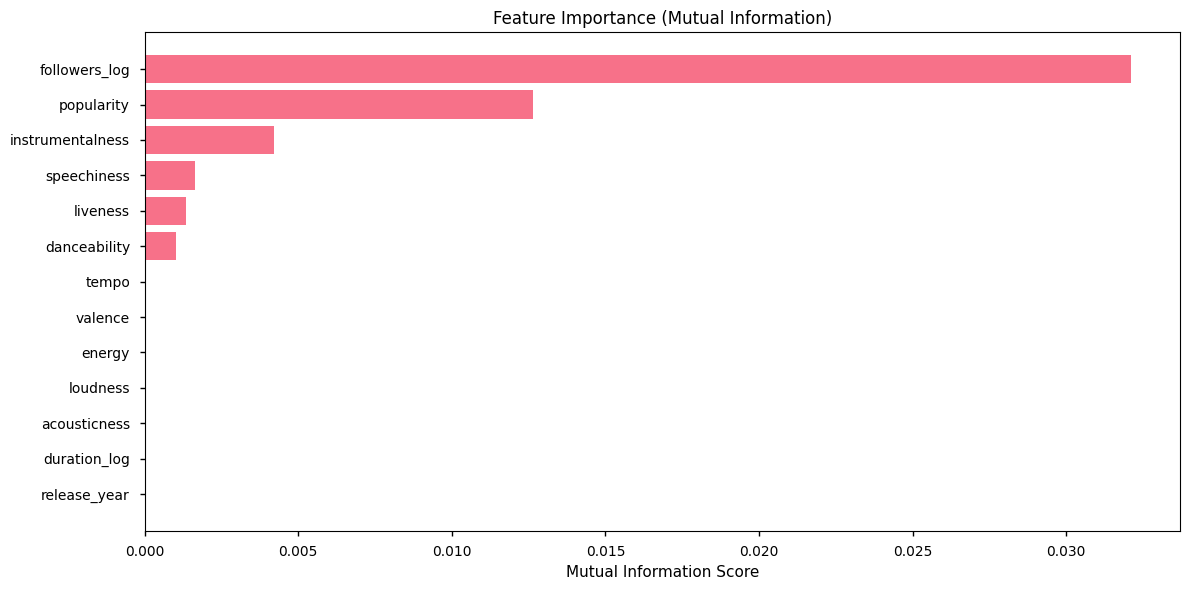


Feature Importance Scores:
release_year: 0.0000
duration_log: 0.0000
acousticness: 0.0000
loudness: 0.0000
energy: 0.0000
valence: 0.0000
tempo: 0.0000
danceability: 0.0010
liveness: 0.0013
speechiness: 0.0016
instrumentalness: 0.0042
popularity: 0.0127
followers_log: 0.0321


In [36]:
X = df[numeric_data].copy()
y = df['hit']

print("\n=== Feature Importance Analysis ===")
print("Features being analyzed:", numeric_data)
print("\nFeature value ranges:")
print(X.describe().loc[['min', 'max']].T)

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, y)

# Plot feature importance
plt.figure(figsize=(12, 6))
importance_df = pd.DataFrame({'feature': numeric_data, 'importance': mi_scores})
importance_df = importance_df.sort_values('importance', ascending=True)
plt.barh(importance_df['feature'], importance_df['importance'])
plt.title('Feature Importance (Mutual Information)')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()

# Print feature importance scores
print("\nFeature Importance Scores:")
for feat, imp in zip(importance_df['feature'], importance_df['importance']):
    print(f"{feat}: {imp:.4f}")

In [37]:
def mutual_info_scores(series):
    return mutual_info_score(series, df.hit)

In [38]:
mi = df[categorical].apply(mutual_info_scores)
mi.sort_values(ascending=False).to_frame(name='MI')

,MI
genre,7.582505e-03
artist_type,1.450744e-03
time_signature,8.883703e-04
explicit,4.580243e-04
key,3.454599e-04
mode,3.497319e-06
song_type,7.149683e-07


**Feature Selection:**
* Consider dropping features with zero mutual information.

* Categorical 'song_type', 'mode', 'key' and 'explicit' may be dropped due to their imbalance and low importance.

In [40]:
df = df.drop(columns=['decade', 'duration_ms', 'followers', 'mode', 'time_signature', 'explicit', 'song_type'])
df.to_csv('../data/dataset_ready.csv', index=False)